<a href="https://colab.research.google.com/github/1101madan/Multiple-Linear-Regression/blob/main/6_MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

---
# Multiple Linear Regression - Price Prediction
---

## Loading the dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Files/ToyotaCorolla - MLR.csv')

In [ ]:
data.shape

(1436, 11)

In [ ]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
data = data.rename(columns={'Age_08_04':'Age'})

In [ ]:
data.isna().sum()

,0
Price,0
Age,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
data['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [ ]:
data.duplicated().sum()

1

In [ ]:
duplicate_rows = data[data.duplicated()]
duplicate_rows

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [ ]:
data = data.drop_duplicates()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1435 non-null   int64 
 1   Age        1435 non-null   int64 
 2   KM         1435 non-null   int64 
 3   Fuel_Type  1435 non-null   object
 4   HP         1435 non-null   int64 
 5   Automatic  1435 non-null   int64 
 6   cc         1435 non-null   int64 
 7   Doors      1435 non-null   int64 
 8   Cylinders  1435 non-null   int64 
 9   Gears      1435 non-null   int64 
 10  Weight     1435 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 134.5+ KB


## EDA

In [ ]:
data.describe()

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,0.055749,1576.560976,4.032753,4.0,5.026481,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,0.229517,424.387533,0.952667,0.0,0.188575,52.251882
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,4.0,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,4.0,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,4.0,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,4.0,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.000000,5.000000,4.0,6.000000,1615.000000


* Cylinder Column only contains one value "4". Column can be dropped as
  * it will help in simplifying the dataset and improving model performance.
* cc Column has max value - '16000' Need to check the data for this value.

In [ ]:
data.describe(include='object')

,Fuel_Type
count,1435
unique,3
top,Petrol
freq,1264


In [ ]:
data.columns

Index(['Price', 'Age', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')


---
checking cc column.

---

In [ ]:
data[data['cc']==16000]

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
80,18950,25,20019,Petrol,110,1,16000,5,4,5,1180


In [ ]:
data = data.drop(data[data['cc']==16000].index,axis=0)

---
Dropping Cylinders Column

---


In [ ]:
data = data.drop(columns={'Cylinders'},axis=1)

---
Descriptive Statistics witht he updated dataframe.

---


In [ ]:
data.describe()

,Price,Age,KM,HP,Automatic,cc,Doors,Gears,Weight
count,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000
mean,10715.177127,56.002092,68605.640865,101.486053,0.055091,1566.502789,4.032078,5.026499,1072.211994
std,3603.436230,18.551732,37482.220175,14.984948,0.228237,186.960827,0.952656,0.188639,52.192552
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,5.000000,1040.000000
50%,9900.000000,61.000000,63455.000000,110.000000,0.000000,1600.000000,4.000000,5.000000,1070.000000
75%,11950.000000,70.000000,87062.250000,110.000000,0.000000,1600.000000,5.000000,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,2000.000000,5.000000,6.000000,1615.000000


** Numerical Columns :**
> * 'Price'
* 'Age'
* 'KM'
* 'Weight'
* 'HP'
* 'cc'.
* 'Doors'
* 'Cylinders'
* 'Gears'


**Categorical Columns:**
> * 'Fuel_Type'
* 'Automatic'


In [ ]:
numerical_columns = ['Price', 'Age', 'KM','Weight','HP','cc','Doors', 'Gears']
categorical_columns = ['Fuel_Type','Automatic']

<Axes: ylabel='Gears'>

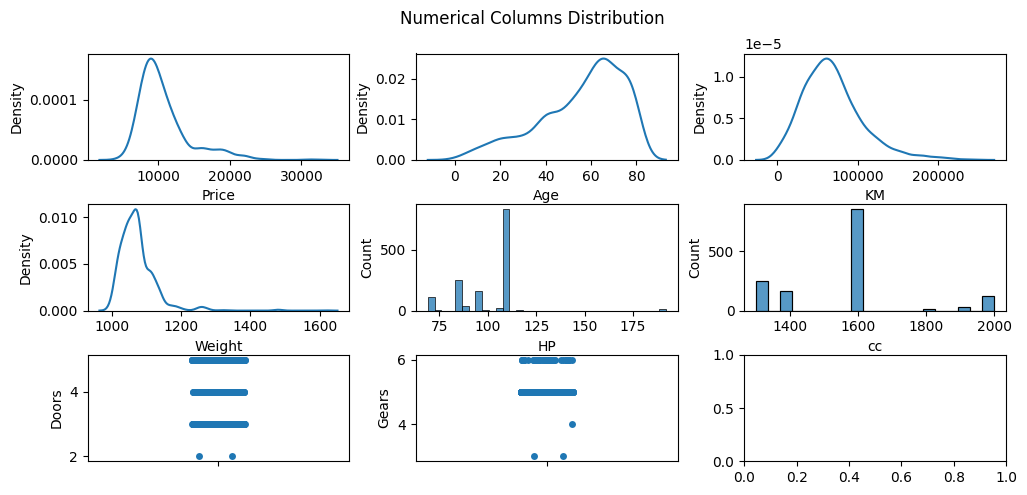

In [ ]:
fig ,axs = plt.subplots(3,3,figsize=(10,5))
plt.suptitle('Numerical Columns Distribution')
plt.tight_layout()
sns.kdeplot(data['Price'],ax=axs[0,0])
sns.kdeplot(data['Age'],ax=axs[0,1])
sns.kdeplot(data['KM'],ax=axs[0,2])
sns.kdeplot(data['Weight'],ax=axs[1,0])
sns.histplot(data['HP'],ax=axs[1,1])
sns.histplot(data['cc'],ax=axs[1,2])
sns.stripplot(data['Doors'],ax=axs[2,0])
sns.stripplot(data['Gears'],ax=axs[2,1])

<Axes: ylabel='Gears'>

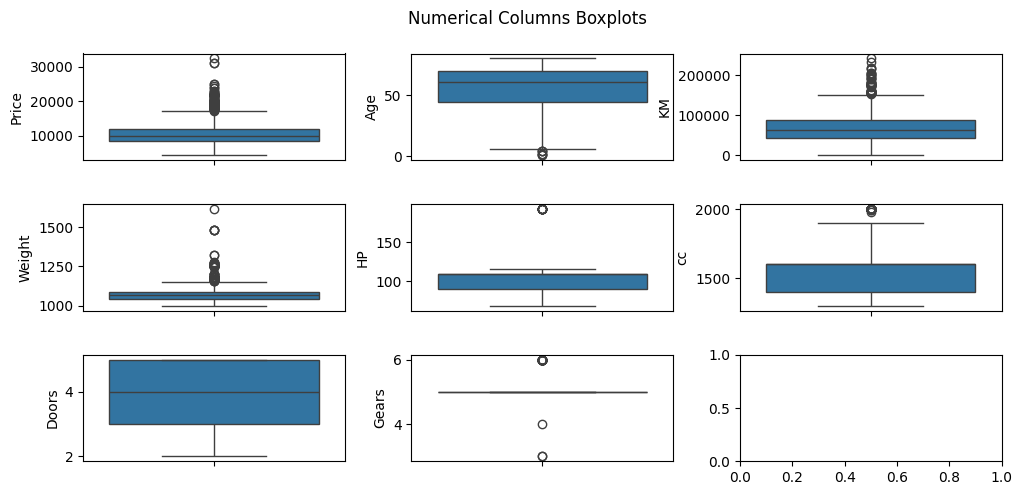

In [ ]:
fig ,axs = plt.subplots(3,3,figsize=(10,5))
plt.suptitle('Numerical Columns Boxplots')
plt.tight_layout()
sns.boxplot(data['Price'],ax=axs[0,0])
sns.boxplot(data['Age'],ax=axs[0,1])
sns.boxplot(data['KM'],ax=axs[0,2])
sns.boxplot(data['Weight'],ax=axs[1,0])
sns.boxplot(data['HP'],ax=axs[1,1])
sns.boxplot(data['cc'],ax=axs[1,2])
sns.boxplot(data['Doors'],ax=axs[2,0])
sns.boxplot(data['Gears'],ax=axs[2,1])

**The Taget variable "Price" is Right Skewed.**

In [ ]:
data['Fuel_Type'].value_counts()

,count
Fuel_Type,
Petrol,1263
Diesel,154
CNG,17


In [ ]:
data['Automatic'].value_counts()

,count
Automatic,
0,1355
1,79


<Axes: xlabel='Automatic'>

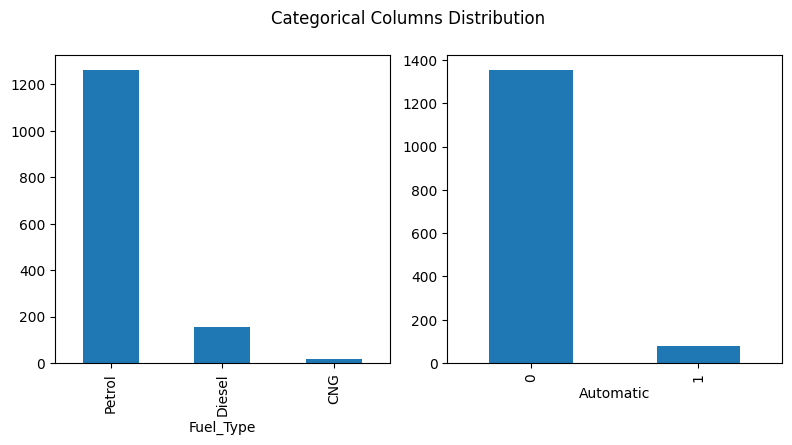

In [ ]:
fig ,axs = plt.subplots(1,2,figsize=(8,4))
plt.suptitle('Categorical Columns Distribution')
plt.tight_layout()
data['Fuel_Type'].value_counts().plot.bar(ax=axs[0])
data['Automatic'].value_counts().plot.bar(ax=axs[1])

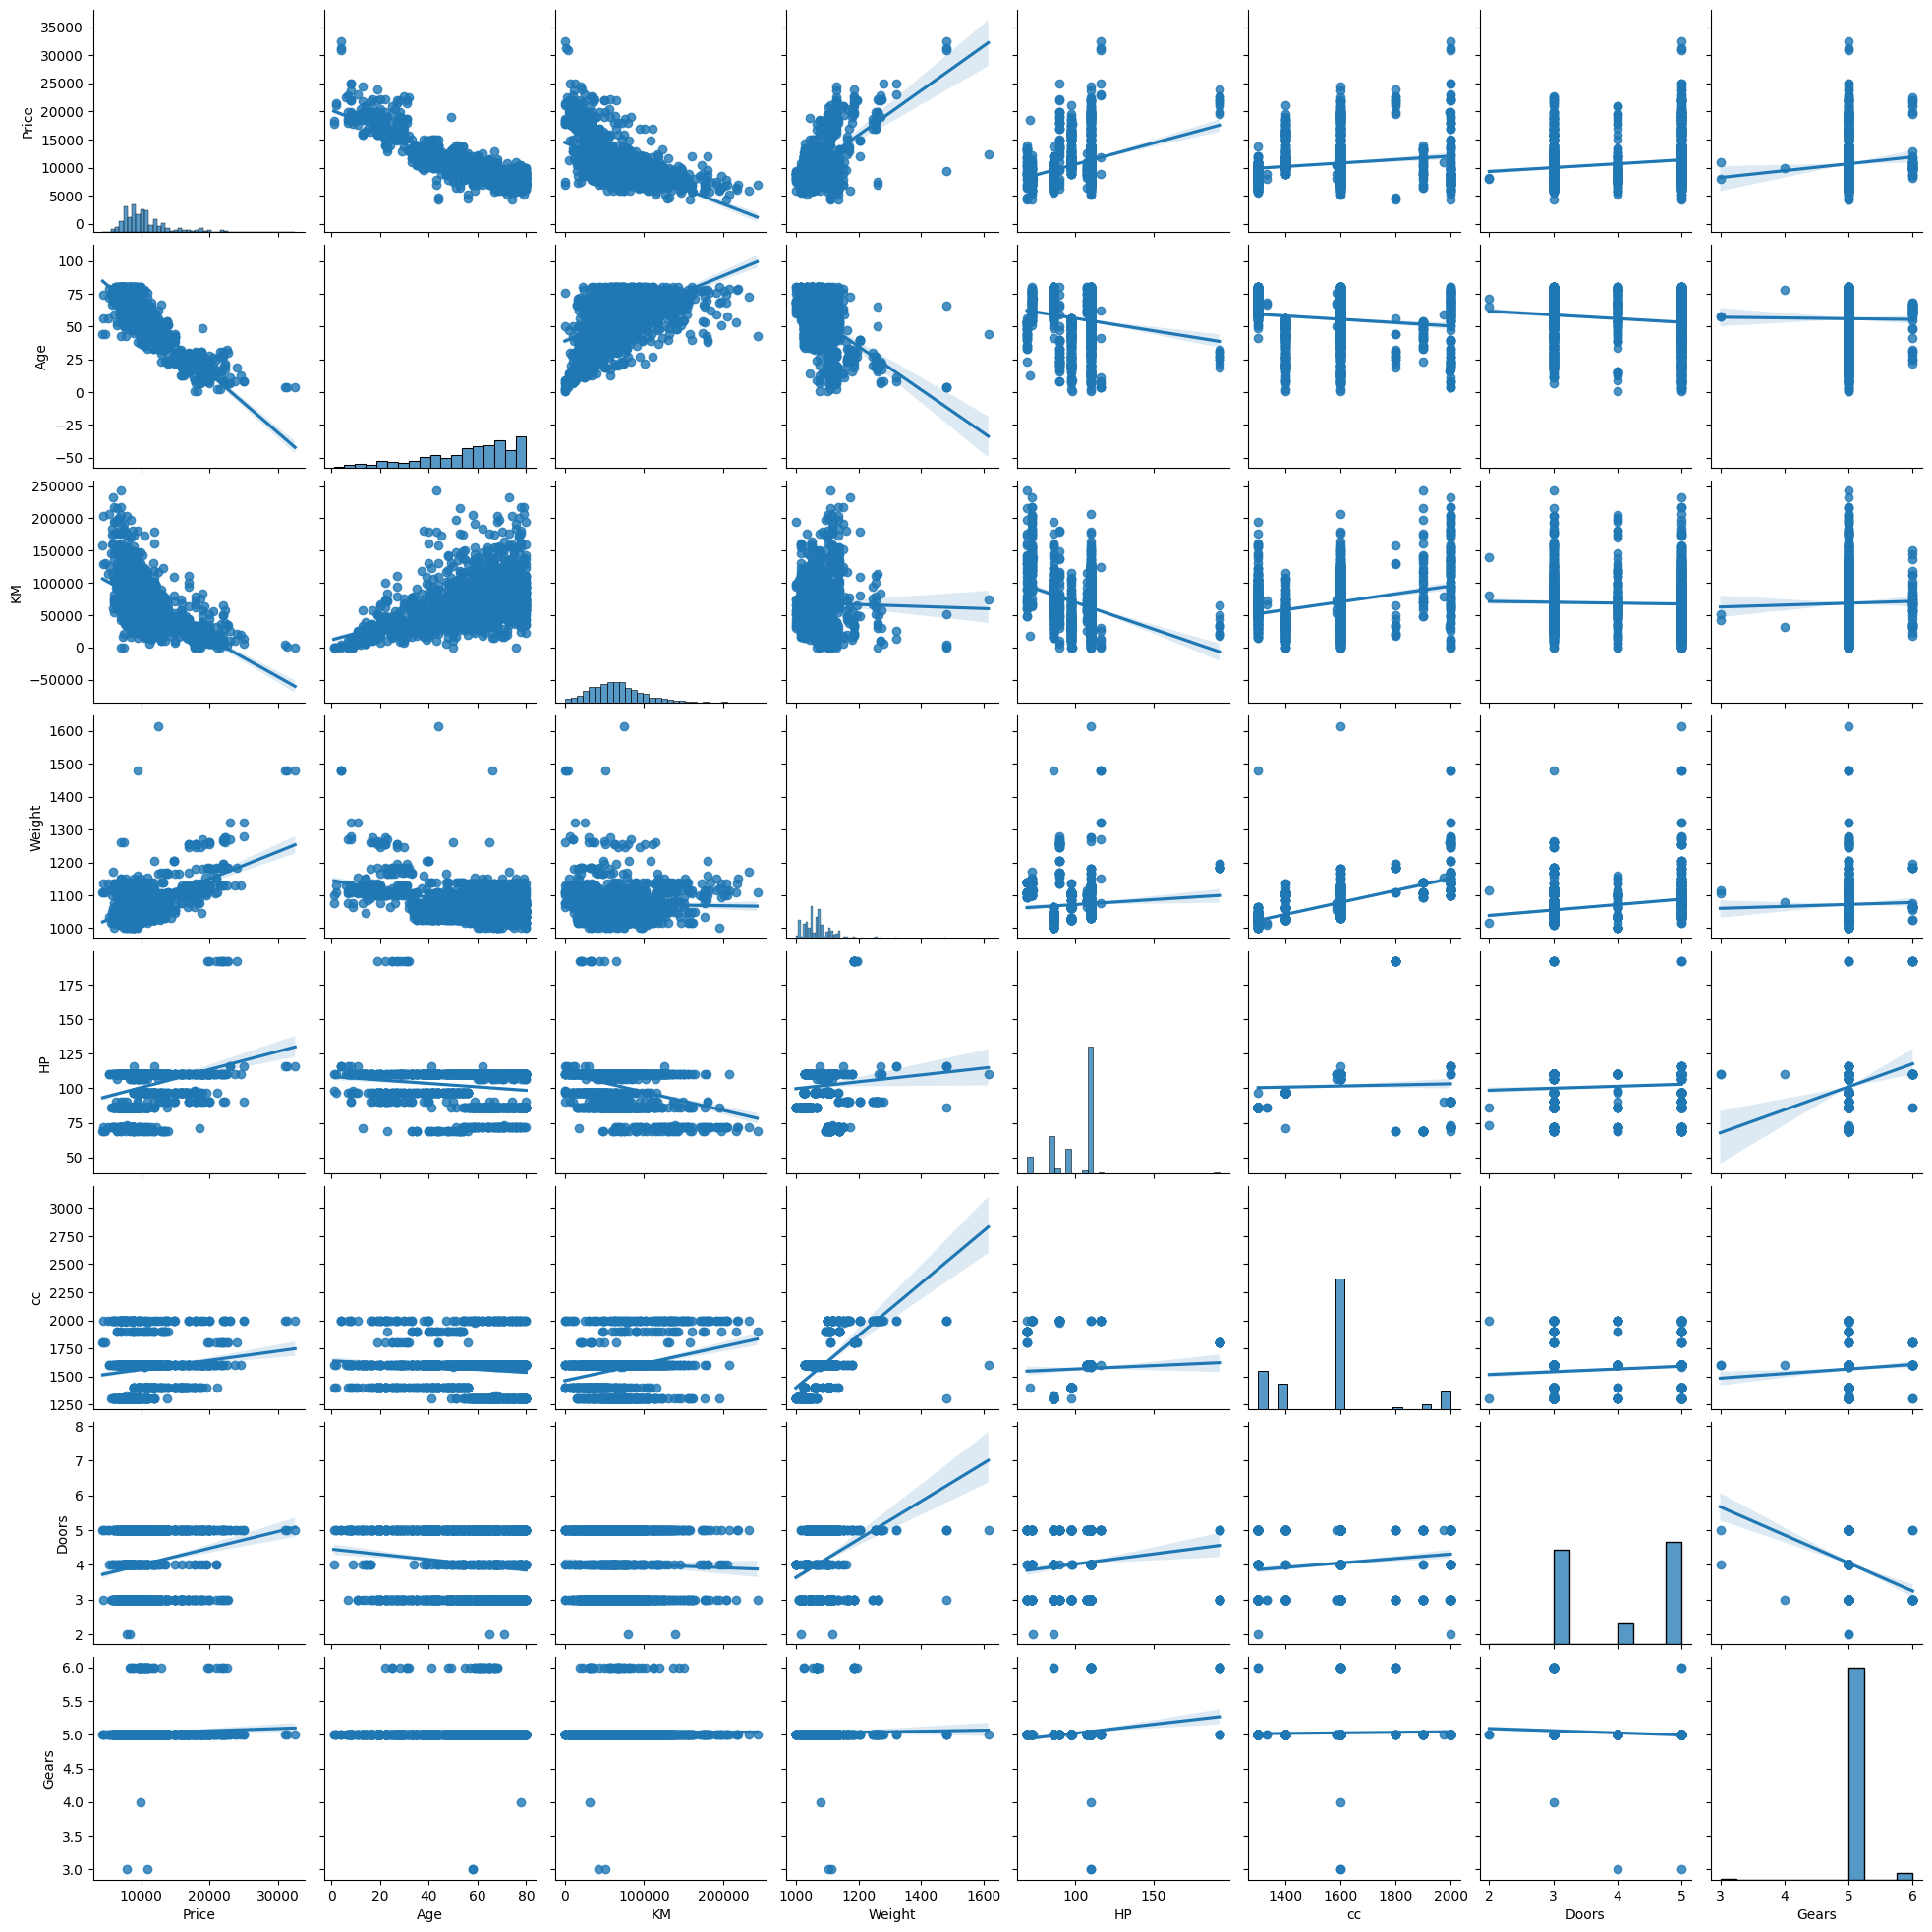

In [ ]:
sns.pairplot(data[numerical_columns],kind="reg")

<Axes: title={'center': 'Correlation Heatmap'}>

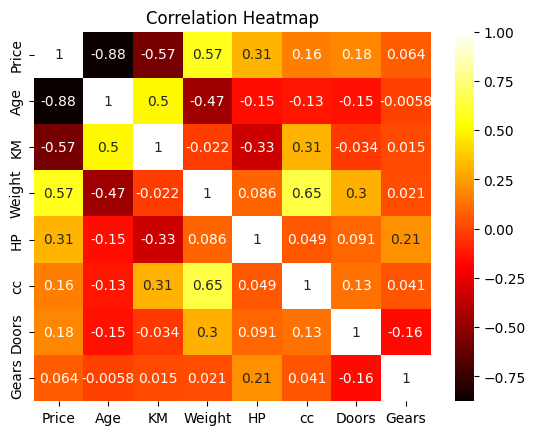

In [ ]:
plt.title('Correlation Heatmap')
sns.heatmap(data[numerical_columns].corr(),annot=True,cmap='hot')

In [ ]:
data[numerical_columns].corr().unstack().sort_values(ascending=False)[8:].reset_index()

,level_0,level_1,0
0,cc,Weight,0.650814
1,Weight,cc,0.650814
2,Price,Weight,0.574483
3,Weight,Price,0.574483
4,KM,Age,0.503851
5,Age,KM,0.503851
6,Price,HP,0.313836
7,HP,Price,0.313836
8,KM,cc,0.305675
9,cc,KM,0.305675


In [ ]:
data[numerical_columns].corr().unstack().sort_values(ascending=True)[:-8].reset_index()

,level_0,level_1,0
0,Price,Age,-0.876059
1,Age,Price,-0.876059
2,Price,KM,-0.568724
3,KM,Price,-0.568724
4,Age,Weight,-0.465226
5,Weight,Age,-0.465226
6,KM,HP,-0.332623
7,HP,KM,-0.332623
8,Gears,Doors,-0.160060
9,Doors,Gears,-0.160060


### Encoding For Categorical Columns.

In [ ]:
 dummy_fuel = pd.get_dummies(data['Fuel_Type'],dtype=int,drop_first=True)
 dummy_fuel

,Diesel,Petrol
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1431,0,1
1432,0,1
1433,0,1
1434,0,1


In [ ]:
data.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170


In [ ]:
data = data.drop(columns=['Fuel_Type'],axis=1)

In [ ]:
data = pd.concat([data,dummy_fuel],axis=1)

In [ ]:
data.head()

,Price,Age,KM,HP,Automatic,cc,Doors,Gears,Weight,Diesel,Petrol
0,13500,23,46986,90,0,2000,3,5,1165,1,0
1,13750,23,72937,90,0,2000,3,5,1165,1,0
2,13950,24,41711,90,0,2000,3,5,1165,1,0
3,14950,26,48000,90,0,2000,3,5,1165,1,0
4,13750,30,38500,90,0,2000,3,5,1170,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1434 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1434 non-null   int64
 1   Age        1434 non-null   int64
 2   KM         1434 non-null   int64
 3   HP         1434 non-null   int64
 4   Automatic  1434 non-null   int64
 5   cc         1434 non-null   int64
 6   Doors      1434 non-null   int64
 7   Gears      1434 non-null   int64
 8   Weight     1434 non-null   int64
 9   Diesel     1434 non-null   int64
 10  Petrol     1434 non-null   int64
dtypes: int64(11)
memory usage: 134.4 KB


## Dataset split into Test & Train

In [ ]:
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols

In [ ]:
train_data,test_data = train_test_split(data,test_size=0.2,random_state=100)

In [ ]:
train_data.shape

(1147, 11)

In [ ]:
test_data.shape

(287, 11)

## Model 1

In [ ]:
train_data.columns

Index(['Price', 'Age', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Gears',
       'Weight', 'Diesel', 'Petrol'],
      dtype='object')

In [ ]:
model_price_01 = ols('Price~Age+ KM+ HP+ Automatic+ cc+ Doors+ Gears+Weight+ Diesel+ Petrol',data=train_data).fit()

In [ ]:
model_price_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     733.8
Date:                Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                        02:49:01   Log-Likelihood:                -9855.2
No. Observations:                1147   AIC:                         1.973e+04
Df Residuals:                    1136   BIC:                         1.979e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2373.2930   1736.984     -1.366      0.172   -5781.351    1034.765
Age         -124.1389      2.893    -42.910      0.000    -129.815    -118.463
KM            -0.0176      0.001    -11.985      0.000      -0.020      -0.015
HP            62.4847      6.498      9.617      0.000      49.736      75.233
Automatic    422.8009    175.636      2.407      0.016      78.194     767.408
cc            -3.8923      0.611     -6.371      0.000      -5.091      -2.694
Doors         74.8982     44.927      1.667      0.096     -13.250     163.047
Gears        526.3512    209.774      2.509      0.012     114.762     937.940
Weight        15.8339      1.317     12.025      0.000      13.250      18.417
Diesel      3299.7101    595.556      5.541      0.000    2131.197    4468.223
Petrol       794.4755    393.617      2.018      0.044      22.177    1566.774
==============================================================================
Omnibus:                      137.981   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              876.877
Skew:                          -0.340   Prob(JB):                    3.88e-191
Kurtosis:                       7.229   Cond. No.                     3.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
mdl_p_value = model_price_01.pvalues.reset_index()
mdl_p_value.columns = ['Variables','P-Value']
mdl_p_value

,Variables,P-Value
0,Intercept,1.721059e-01
1,Age,6.426553e-240
2,KM,2.999640e-31
3,HP,4.217328e-21
4,Automatic,1.623137e-02
5,cc,2.725211e-10
6,Doors,9.576578e-02
7,Gears,1.224124e-02
8,Weight,1.942084e-31
9,Diesel,3.745361e-08


In [ ]:
mdl_p_value[mdl_p_value['P-Value']>0.05]

,Variables,P-Value
0,Intercept,0.172106
6,Doors,0.095766


## Model 2
---
* Without Doors from the Model as the P value is greater than Level of significance of 0.05


In [ ]:
model_price_02 = ols('Price~Age+ KM+ HP+ Automatic+ cc+ Gears+Weight+ Diesel+ Petrol',data=train_data).fit()

In [ ]:
model_price_02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     813.8
Date:                Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                        02:49:02   Log-Likelihood:                -9856.6
No. Observations:                1147   AIC:                         1.973e+04
Df Residuals:                    1137   BIC:                         1.978e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2626.9798   1731.659     -1.517      0.130   -6024.586     770.627
Age         -124.2622      2.894    -42.933      0.000    -129.941    -118.583
KM            -0.0174      0.001    -11.895      0.000      -0.020      -0.015
HP            60.8178      6.425      9.466      0.000      48.211      73.424
Automatic    391.7721    174.783      2.241      0.025      48.838     734.706
cc            -3.7526      0.606     -6.196      0.000      -4.941      -2.564
Gears        466.2225    206.812      2.254      0.024      60.446     871.999
Weight        16.5611      1.243     13.320      0.000      14.122      19.001
Diesel      3159.8500    590.078      5.355      0.000    2002.085    4317.615
Petrol       842.0362    392.889      2.143      0.032      71.167    1612.905
==============================================================================
Omnibus:                      151.926   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1047.022
Skew:                          -0.382   Prob(JB):                    4.39e-228
Kurtosis:                       7.618   Cond. No.                     3.51e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model_price_02.params

,0
Intercept,-2626.979755
Age,-124.262231
KM,-0.017402
HP,60.817762
Automatic,391.772073
cc,-3.752574
Gears,466.222451
Weight,16.561058
Diesel,3159.849965
Petrol,842.036199


#### Calculating VIF
* To Detect Multicollinearity in regression Model.

In [ ]:
train_data.columns

Index(['Price', 'Age', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Gears',
       'Weight', 'Diesel', 'Petrol'],
      dtype='object')

In [ ]:
door_mdl_rsq = ols('Doors~Price+ Age+ KM+ HP+ Automatic+ cc+ Gears+ Weight+ Diesel+ Petrol',data=train_data).fit().rsquared
age_mdl_rsq = ols('Age~Price+ KM+ HP+ Automatic+ cc+ Doors+ Gears+ Weight+ Diesel+ Petrol',data=train_data).fit().rsquared
km_mdl_rsq = ols('KM~Price+ Age+ HP+ Automatic+ cc+ Doors+ Gears+ Weight+ Diesel+ Petrol',data=train_data).fit().rsquared
hp_mdl_rsq = ols('HP~Price+ Age+ KM+ Automatic+ cc+ Doors+ Gears+ Weight+ Diesel+ Petrol',data=train_data).fit().rsquared
cc_mdl_rsq = ols('cc~Price+ Age+ KM+ HP+ Automatic+ Doors+ Gears+ Weight+ Diesel+ Petrol',data=train_data).fit().rsquared
gears_mdl_rsq = ols('Gears~Price+ Age+ KM+ HP+ Automatic+ cc+ Doors+ Weight+ Diesel+ Petrol',data=train_data).fit().rsquared
weight_mdl_rsq = ols('Weight~Price+ Age+ KM+ HP+ Automatic+ cc+ Doors+ Gears+ Diesel+ Petrol',data=train_data).fit().rsquared
diesel_mdl_rsq = ols('Diesel~Price+ Age+ KM+ HP+ Automatic+ cc+ Doors+ Gears+ Weight+ Petrol',data=train_data).fit().rsquared
petrol_mdl_rsq = ols('Petrol~Price+ Age+ KM+ HP+ Automatic+ cc+ Doors+ Gears+ Weight+ Diesel',data=train_data).fit().rsquared

In [ ]:
door_vif = 1/(1-door_mdl_rsq)
age_vif = 1/(1-age_mdl_rsq)
km_vif = 1/(1-km_mdl_rsq)
hp_vif = 1/(1-hp_mdl_rsq)
cc_vif = 1/(1-cc_mdl_rsq)
gears_vif = 1/(1-gears_mdl_rsq)
weight_vif = 1/(1-weight_mdl_rsq)
diesel_vif = 1/(1-diesel_mdl_rsq)
petrol_vif = 1/(1-petrol_mdl_rsq)

In [ ]:
petrol_mdl_rsq

0.9042007463378308

In [ ]:
vif_data = pd.DataFrame({'Variables': ['Door','age','km','hp','cc','gears','weight','diesel','petrol'],
                         'VIF':[door_vif,age_vif,km_vif,hp_vif,cc_vif,gears_vif,weight_vif,diesel_vif,petrol_vif]})

In [ ]:
vif_data

,Variables,VIF
0,Door,1.222981
1,age,5.021510
2,km,2.208508
3,hp,6.726122
4,cc,8.889237
5,gears,1.138124
6,weight,3.446151
7,diesel,22.459127
8,petrol,10.438495


### Plotting to check the model Performance -


#### 1. QQ Plot:

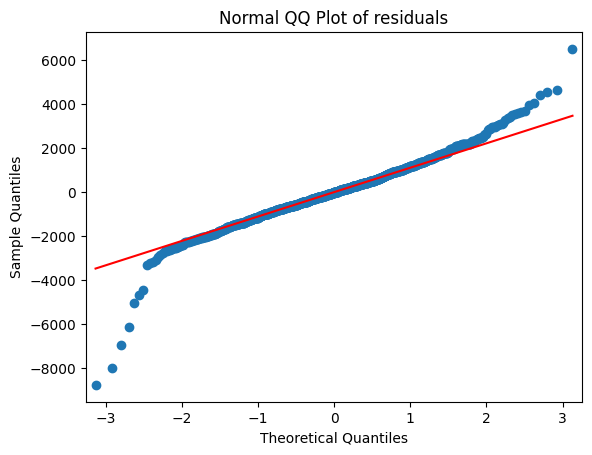

In [ ]:
from statsmodels.api import qqplot
qqplot = qqplot(model_price_02.resid,line='q')
plt.title('Normal QQ Plot of residuals')
plt.show()

In [ ]:
list(np.where((model_price_01.resid>3000)|(model_price_01.resid<-3000)))

[array([  43,   52,   92,  151,  172,  220,  238,  274,  316,  336,  367,
         388,  403,  437,  466,  484,  498,  507,  518,  559,  619,  718,
         765,  778,  834,  956,  990,  995, 1016, 1105])]

####  Residual Plot

In [ ]:
def std_vals(vals):
  return (vals-vals.mean())/vals.std()

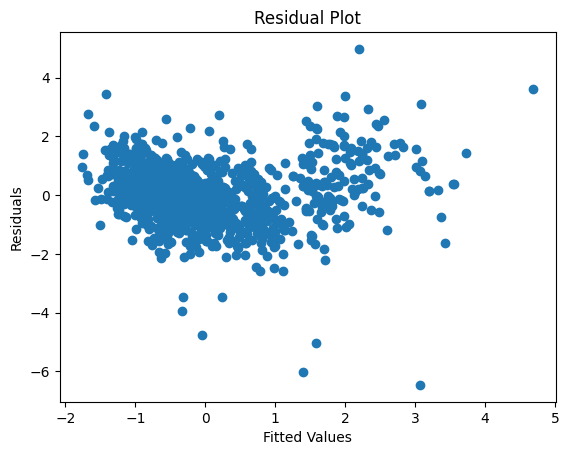

In [ ]:
plt.scatter(std_vals(model_price_01.fittedvalues),std_vals(model_price_01.resid))
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

#### Plotting Residuals Vs. Regressors.

* to understand the regression results

In [ ]:
from statsmodels.graphics.regressionplots import plot_regress_exog

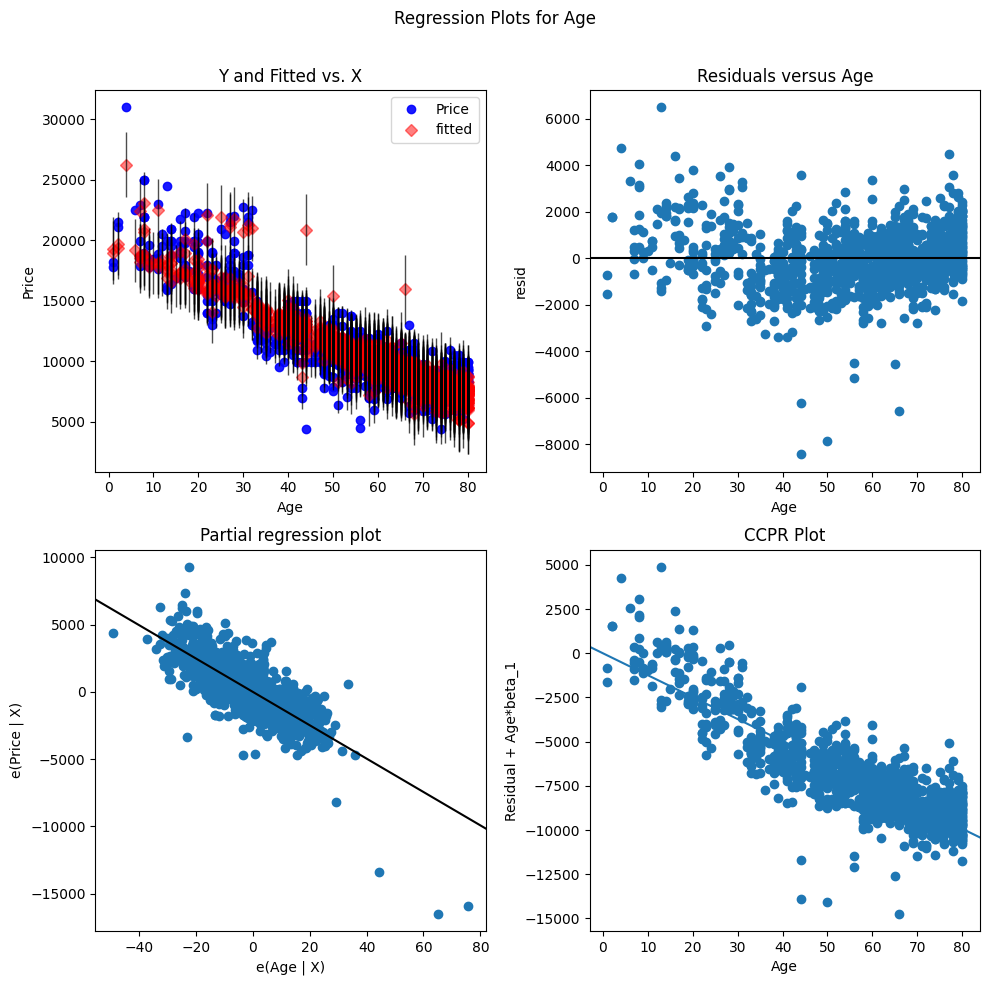

In [ ]:
fig = plt.figure(figsize=(10,10))
fig = plot_regress_exog(model_price_01,'Age',fig=fig)
plt.show()

In [ ]:
train_data.columns

Index(['Price', 'Age', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Gears',
       'Weight', 'Diesel', 'Petrol'],
      dtype='object')

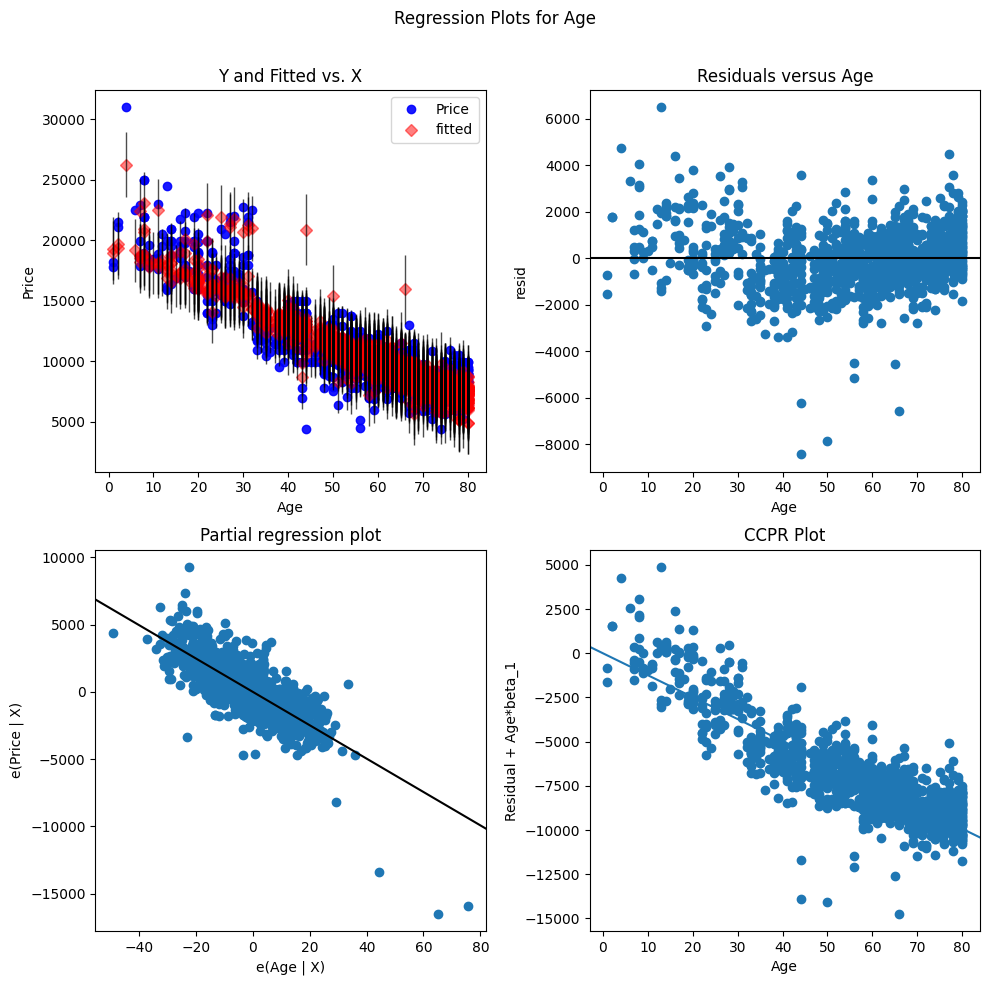

In [ ]:
fig = plt.figure(figsize=(10,10))
fig = plot_regress_exog(model_price_01,'Age',fig=fig)
plt.show()

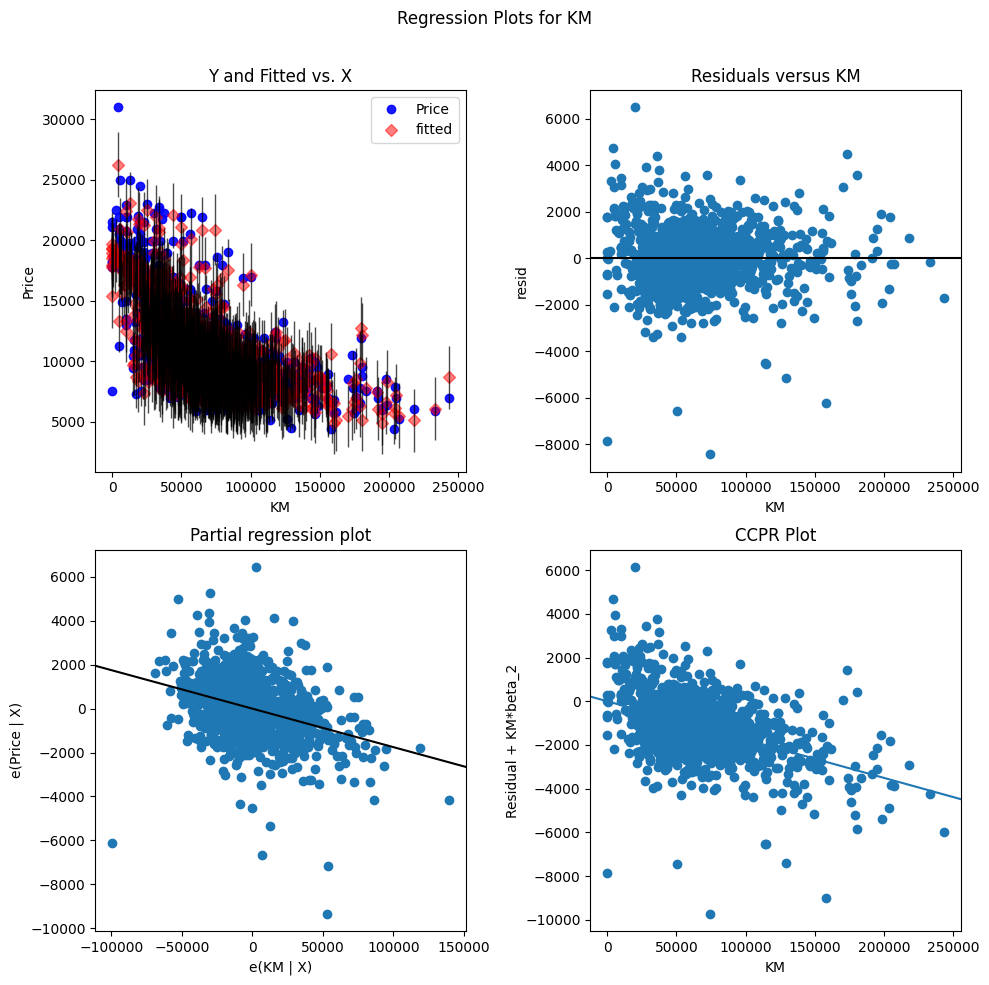

In [ ]:
fig = plt.figure(figsize=(10,10))
fig = plot_regress_exog(model_price_01,'KM',fig=fig)
plt.show()

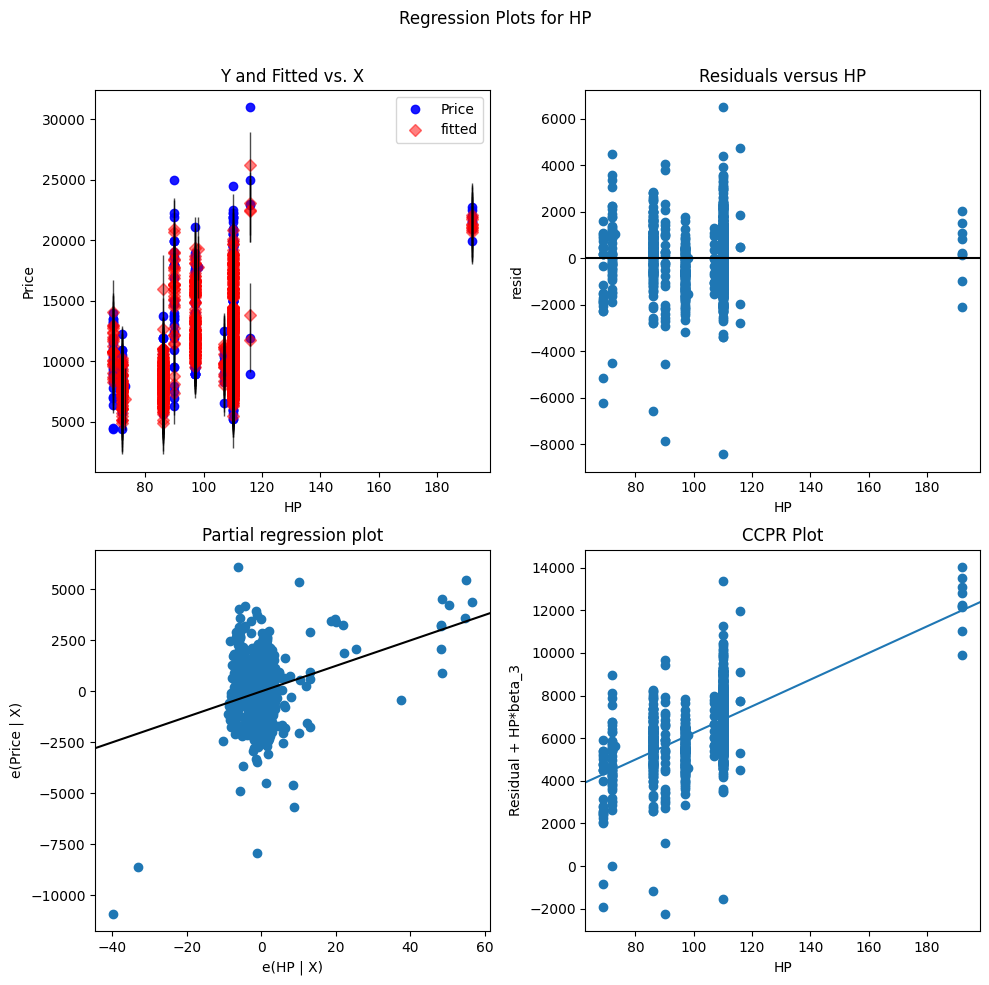

In [ ]:
fig = plt.figure(figsize=(10,10))
fig = plot_regress_exog(model_price_01,'HP',fig=fig)
plt.show()

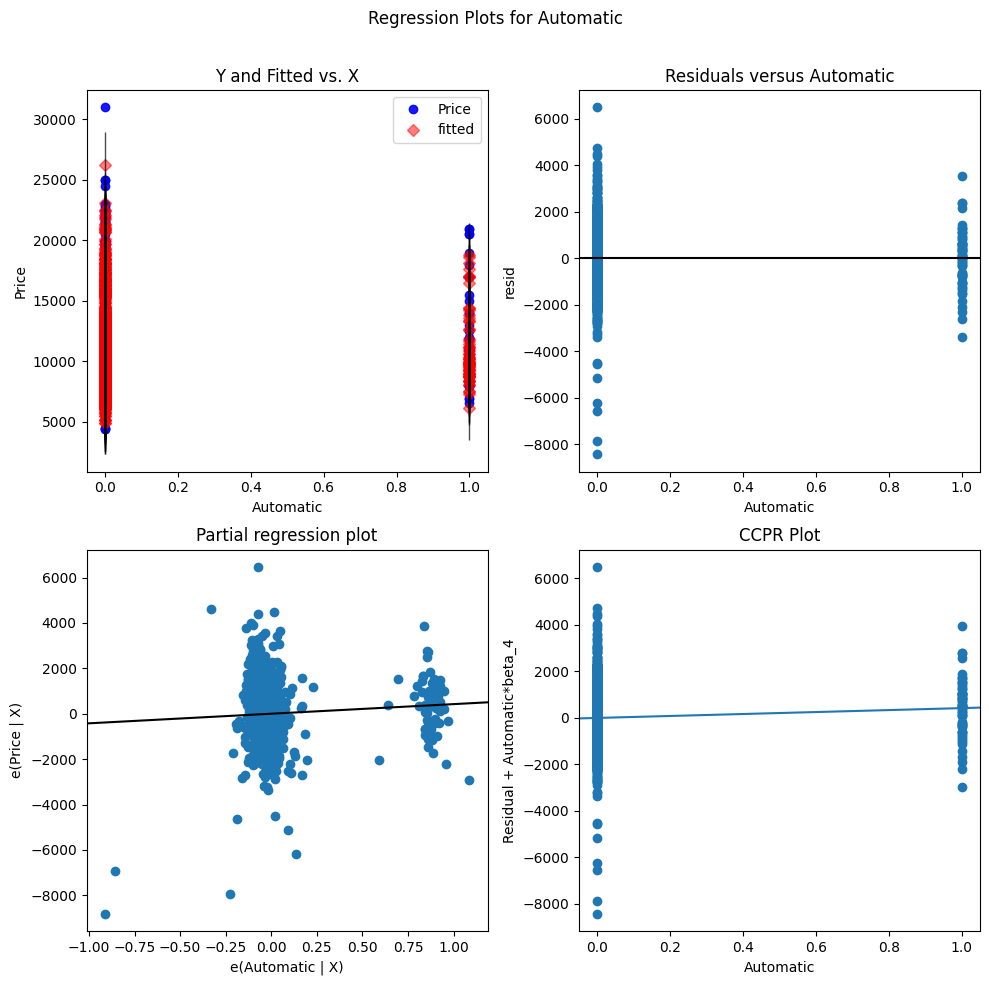

In [ ]:
fig = plt.figure(figsize=(10,10))
fig = plot_regress_exog(model_price_01,'Automatic',fig=fig)
plt.show()

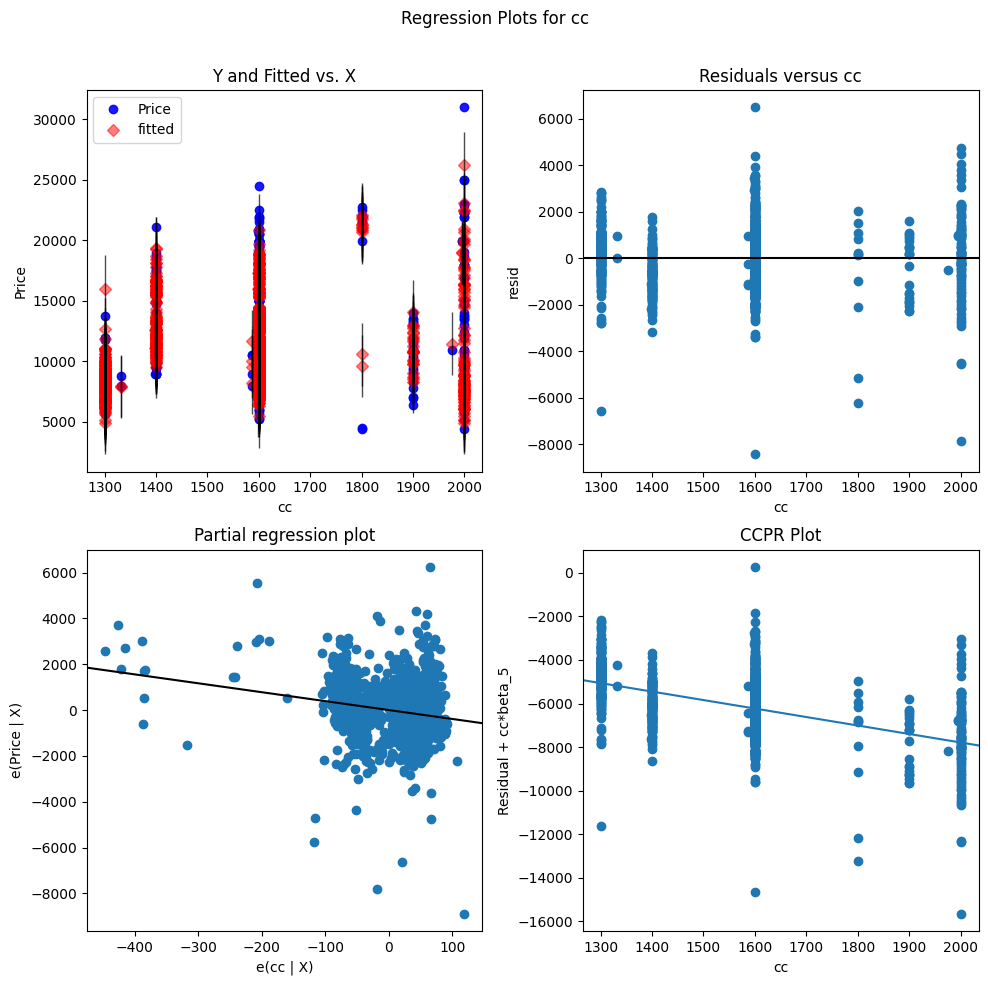

In [ ]:
fig = plt.figure(figsize=(10,10))
fig = plot_regress_exog(model_price_01,'cc',fig=fig)
plt.show()

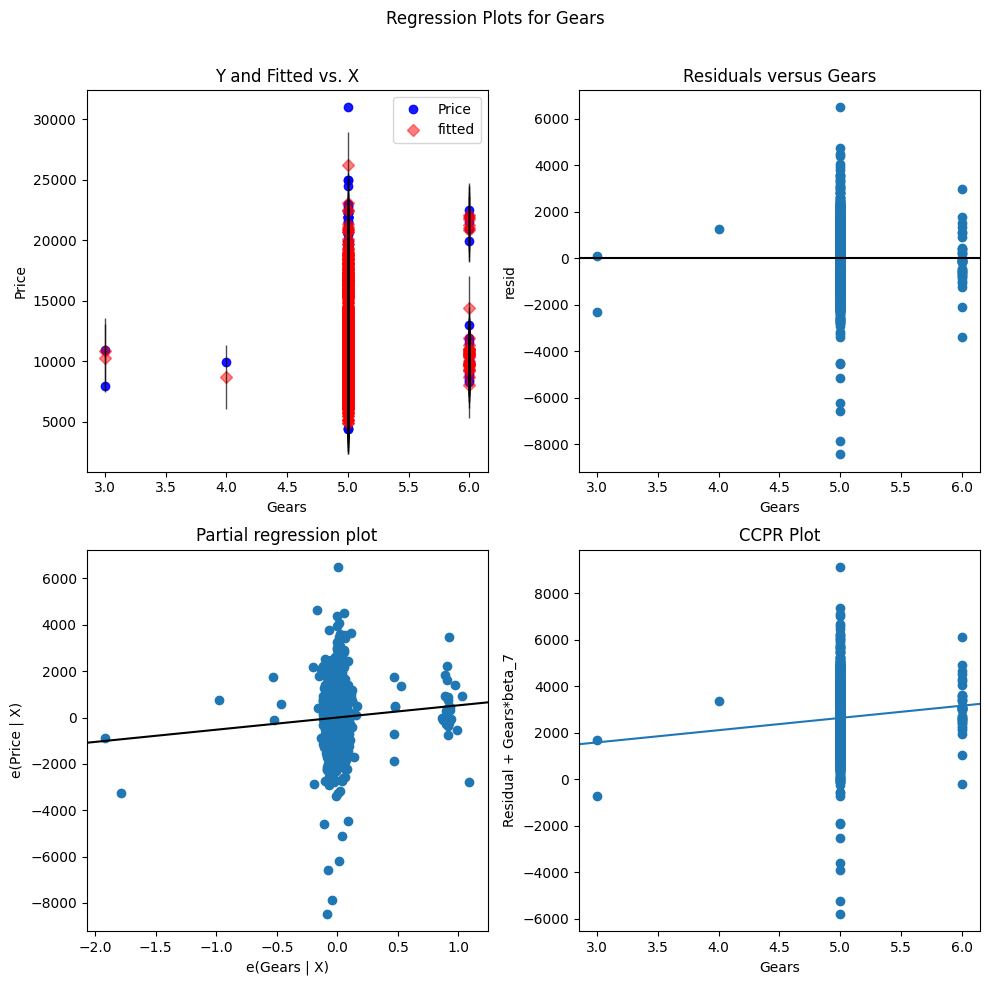

In [ ]:
fig = plt.figure(figsize=(10,10))
fig = plot_regress_exog(model_price_01,'Gears',fig=fig)
plt.show()

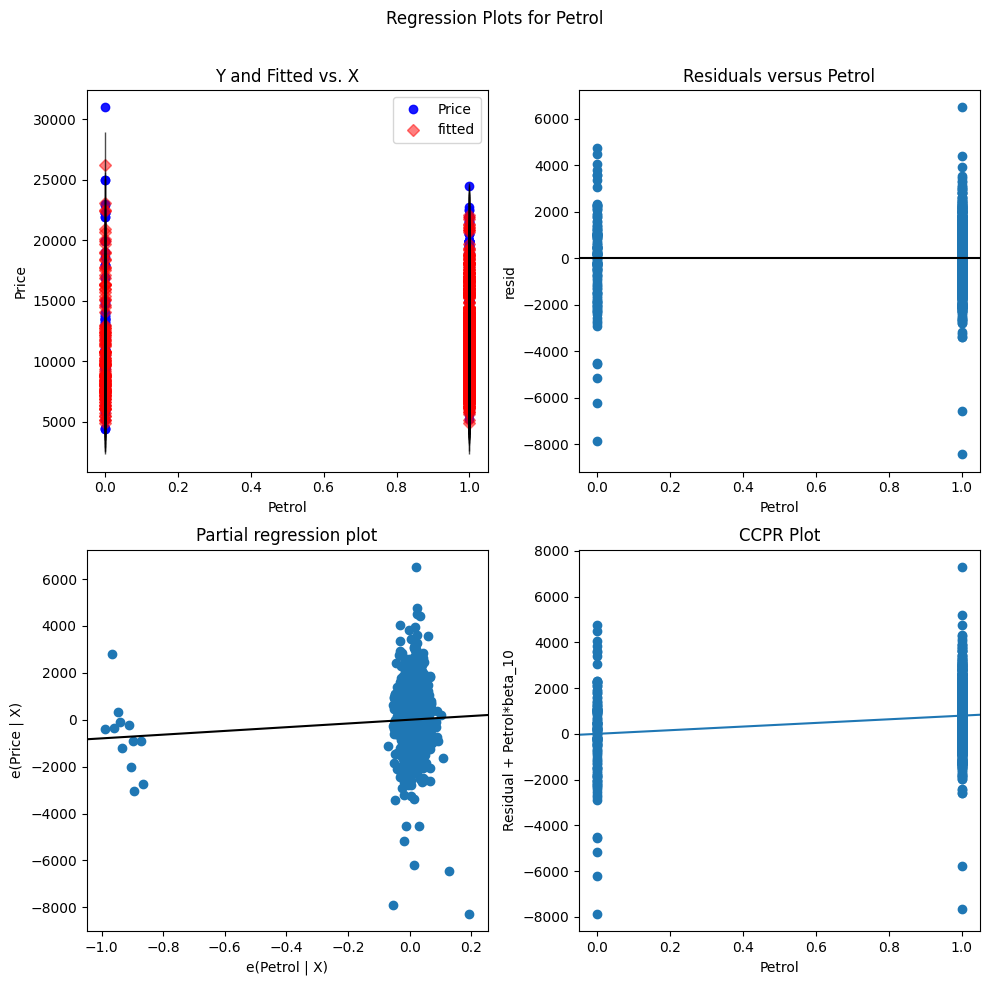

In [ ]:
fig = plt.figure(figsize=(10,10))
fig = plot_regress_exog(model_price_01,'Petrol',fig=fig)
plt.show()

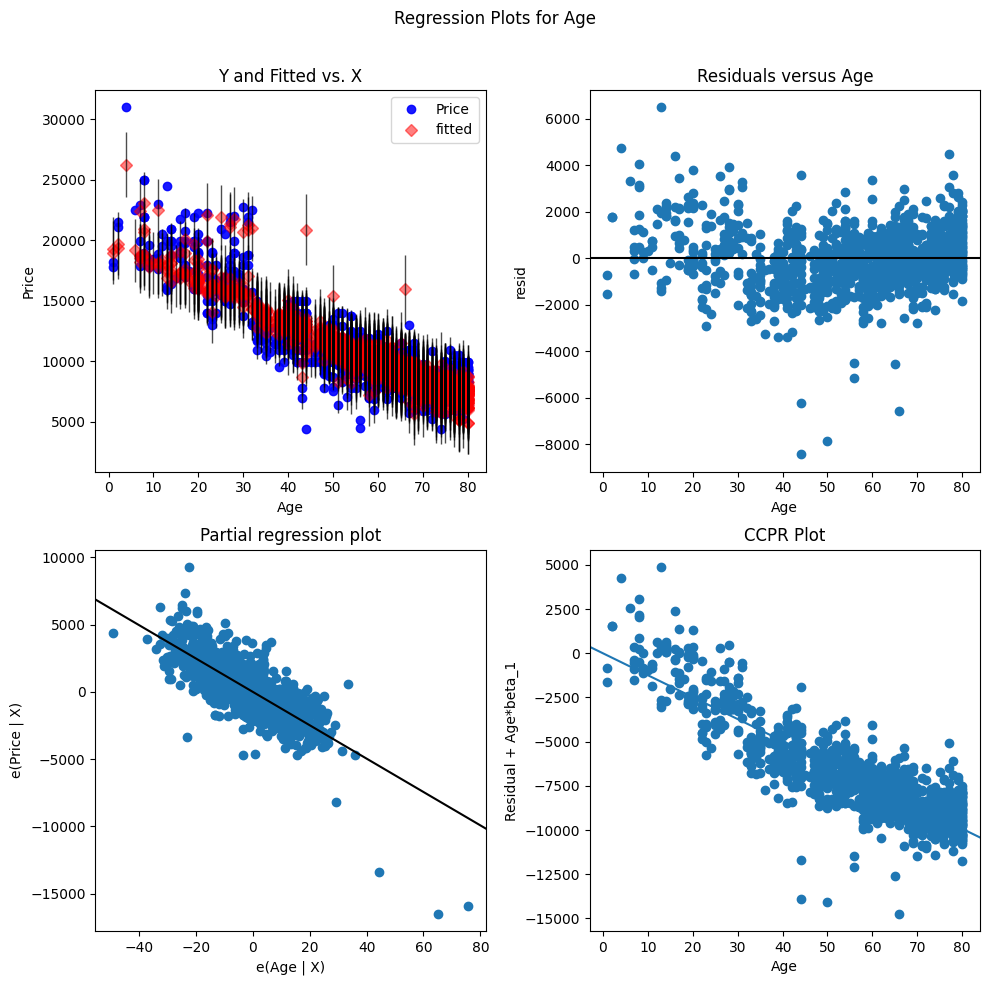

In [ ]:
fig = plt.figure(figsize=(10,10))
fig = plot_regress_exog(model_price_01,'Age',fig=fig)
plt.show()

#### Cooks Distance - Model 2:
* Stem Plot to Vizualize the Outlier observation in the data.

In [ ]:
summary_frame_df = model_price_02.get_influence().summary_frame()

In [ ]:
summary_frame_df = model_price_02.get_influence().summary_frame()
cooks_dist = summary_frame_df['cooks_d'].sort_index()
cooks_dist = pd.DataFrame(cooks_dist)
cooks_dist

,cooks_d
0,0.006999
1,0.003690
2,0.005043
3,0.000969
4,0.003500
...,...
1429,0.000024
1430,0.000699
1431,0.000947
1432,0.002979


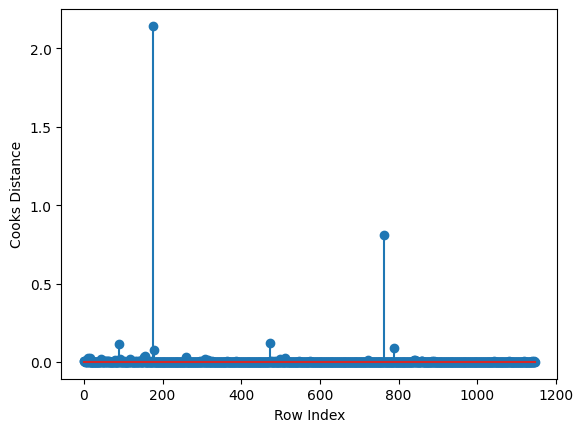

In [ ]:
plt.stem(np.arange(len(train_data)),np.round(cooks_dist,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
cooks_dist['cooks_d'].sort_values(ascending=False).head()

,cooks_d
221,2.143944
960,0.807746
601,0.117543
110,0.114145
991,0.091994


#### Influence plot - Model 2

* Identification of Potential Outliers in the data by Vizualizing

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

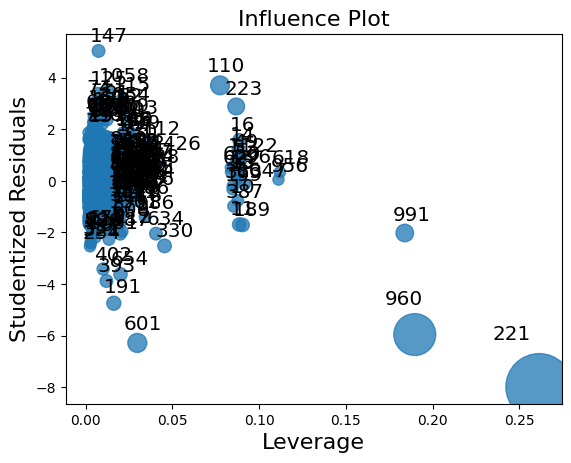

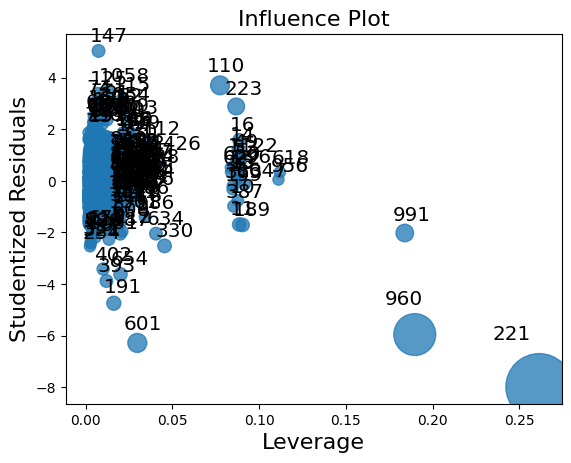

In [ ]:
influence_plot(model_price_02)

In [ ]:
summary_frame_df['hat_diag'].sort_values(ascending=False).head(10)

,hat_diag
221,0.261467
960,0.189728
991,0.183986
618,0.111997
956,0.111178
1047,0.091765
189,0.090486
296,0.089706
49,0.089626
53,0.089211


### Dropping the Outliers

In [ ]:
train_data[train_data.index.isin([221,960])]

,Price,Age,KM,HP,Automatic,cc,Doors,Gears,Weight,Diesel,Petrol
960,9390,66,50806,86,0,1300,3,5,1480,0,1
221,12450,44,74172,110,0,1600,5,5,1615,0,1


In [ ]:
train_data.head()

,Price,Age,KM,HP,Automatic,cc,Doors,Gears,Weight,Diesel,Petrol
735,10450,62,84549,110,0,1600,5,5,1075,0,1
838,9950,59,67010,110,0,1600,3,6,1065,0,1
511,11900,51,53408,110,0,1600,5,5,1080,0,1
1255,7950,75,76382,110,0,1600,3,5,1055,0,1
1358,7950,76,59815,110,0,1587,3,5,1055,0,1


In [ ]:
train_data.shape

(1147, 11)

In [ ]:
train_data_corolla = train_data.drop(train_data.index[[960,221]],axis=0).reset_index()
train_data_corolla.shape

(1145, 12)

In [ ]:
train_data_corolla.drop((['index','Doors']),axis=1,inplace=True)

In [ ]:
train_data_corolla.head()

,Price,Age,KM,HP,Automatic,cc,Gears,Weight,Diesel,Petrol
0,10450,62,84549,110,0,1600,5,1075,0,1
1,9950,59,67010,110,0,1600,6,1065,0,1
2,11900,51,53408,110,0,1600,5,1080,0,1
3,7950,75,76382,110,0,1600,5,1055,0,1
4,7950,76,59815,110,0,1587,5,1055,0,1


## Model 3

In [ ]:
model_price_03 = ols('Price~Age+KM+HP+Automatic+cc+Gears+Weight+Diesel+Petrol',data=train_data_corolla).fit()
model_price_03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     814.3
Date:                Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                        02:49:52   Log-Likelihood:                -9839.1
No. Observations:                1145   AIC:                         1.970e+04
Df Residuals:                    1135   BIC:                         1.975e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2482.0595   1733.847     -1.432      0.153   -5883.964     919.845
Age         -124.4396      2.896    -42.967      0.000    -130.122    -118.757
KM            -0.0174      0.001    -11.897      0.000      -0.020      -0.015
HP            61.0658      6.426      9.504      0.000      48.458      73.673
Automatic    391.4127    174.742      2.240      0.025      48.559     734.267
cc            -3.7831      0.606     -6.245      0.000      -4.972      -2.594
Gears        463.7978    206.769      2.243      0.025      58.106     869.490
Weight        16.4680      1.245     13.232      0.000      14.026      18.910
Diesel      3184.2541    590.144      5.396      0.000    2026.359    4342.150
Petrol       841.4346    392.797      2.142      0.032      70.744    1612.125
==============================================================================
Omnibus:                      150.489   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1029.833
Skew:                          -0.379   Prob(JB):                    2.37e-224
Kurtosis:                       7.584   Cond. No.                     3.52e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Cooks Distance - Model 3

In [ ]:
model_price_03.get_influence().summary_frame()['cooks_d'].sort_values(ascending=False).head()

,cooks_d
273,2.129770
151,0.801873
387,0.117430
465,0.114945
292,0.092177


<StemContainer object of 3 artists>

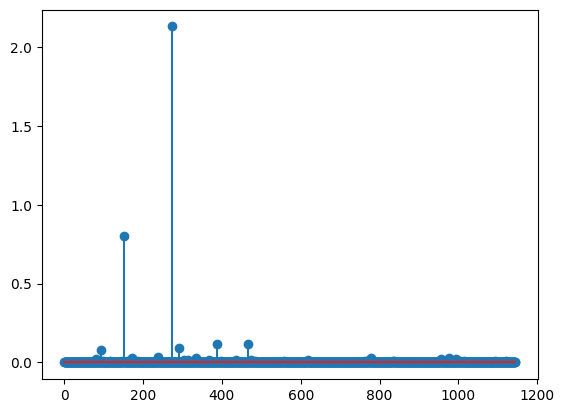

In [ ]:
plt.stem(np.arange(len(train_data_corolla)),np.round(model_price_03.get_influence().summary_frame()['cooks_d'],3))


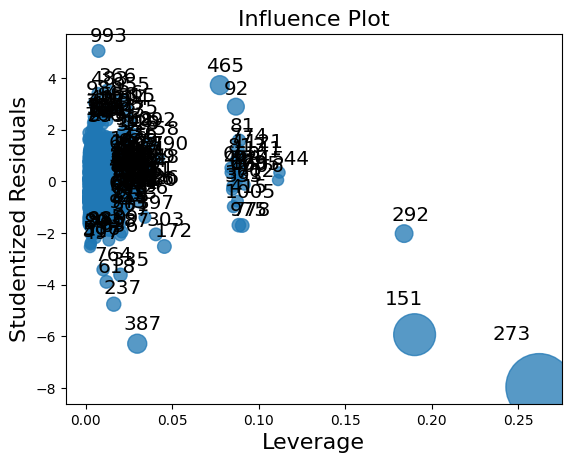

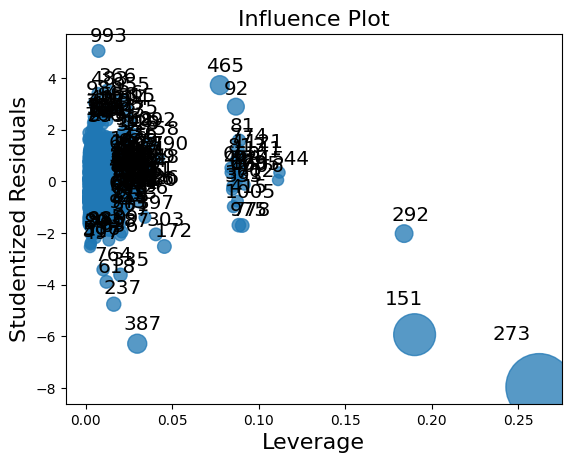

In [ ]:
influence_plot(model_price_03)

### Dropping Outliers - Model 3

In [ ]:
train_data_corolla2 = train_data_corolla.drop(train_data_corolla.index[[273,151]]).reset_index()

In [ ]:
train_data_corolla.shape

(1145, 10)

In [ ]:
train_data_corolla2.shape

(1143, 11)

In [ ]:
train_data_corolla2.drop(['index'],axis=1,inplace=True)

In [ ]:
train_data_corolla2.columns

Index(['Price', 'Age', 'KM', 'HP', 'Automatic', 'cc', 'Gears', 'Weight',
       'Diesel', 'Petrol'],
      dtype='object')

## Model 4

In [ ]:
price_model_04 = ols('Price~ Age+ KM+ HP+ Automatic+ cc+ Gears+ Weight+Diesel+ Petrol',data=train_data_corolla2).fit()
price_model_04.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     934.1
Date:                Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                        02:50:07   Log-Likelihood:                -9753.4
No. Observations:                1143   AIC:                         1.953e+04
Df Residuals:                    1133   BIC:                         1.958e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.52e+04   1941.363     -7.831      0.000    -1.9e+04   -1.14e+04
Age         -114.4881      2.851    -40.159      0.000    -120.082    -108.895
KM            -0.0166      0.001    -12.021      0.000      -0.019      -0.014
HP            38.9487      6.321      6.162      0.000      26.547      51.350
Automatic      6.1883    167.616      0.037      0.971    -322.684     335.061
cc            -3.6114      0.571     -6.325      0.000      -4.732      -2.491
Gears        534.7544    194.817      2.745      0.006     152.512     916.997
Weight        29.2061      1.575     18.545      0.000      26.116      32.296
Diesel      1632.1444    570.374      2.862      0.004     513.037    2751.252
Petrol      1159.0859    370.862      3.125      0.002     431.432    1886.739
==============================================================================
Omnibus:                      115.611   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              698.604
Skew:                          -0.221   Prob(JB):                    2.00e-152
Kurtosis:                       6.804   Cond. No.                     4.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
train_data_corolla2.columns

Index(['Price', 'Age', 'KM', 'HP', 'Automatic', 'cc', 'Gears', 'Weight',
       'Diesel', 'Petrol'],
      dtype='object')

In [ ]:
train_data_corolla3 = train_data_corolla2.drop(columns='Automatic',axis=1)

In [ ]:
train_data_corolla3.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Gears', 'Weight', 'Diesel',
       'Petrol'],
      dtype='object')

## Model 5:

In [ ]:
price_model_05 = ols('Price~Age+ KM+ HP+ cc+ Gears+ Weight+Diesel+Petrol',data=train_data_corolla3).fit()
price_model_05.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1052.
Date:                Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                        02:50:07   Log-Likelihood:                -9753.4
No. Observations:                1143   AIC:                         1.952e+04
Df Residuals:                    1134   BIC:                         1.957e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.521e+04   1912.821     -7.954      0.000    -1.9e+04   -1.15e+04
Age         -114.4689      2.802    -40.855      0.000    -119.966    -108.972
KM            -0.0166      0.001    -12.061      0.000      -0.019      -0.014
HP            38.9151      6.252      6.224      0.000      26.648      51.183
cc            -3.6107      0.570     -6.330      0.000      -4.730      -2.491
Gears        534.1821    194.114      2.752      0.006     153.319     915.045
Weight        29.2219      1.515     19.289      0.000      26.250      32.194
Diesel      1629.3999    565.260      2.883      0.004     520.328    2738.472
Petrol      1159.1513    370.694      3.127      0.002     431.827    1886.475
==============================================================================
Omnibus:                      115.663   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              699.099
Skew:                          -0.222   Prob(JB):                    1.56e-152
Kurtosis:                       6.806   Cond. No.                     4.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Plotting Cooks Distance - Model 5

In [ ]:
price_model_05.get_influence().summary_frame()['cooks_d'].round(3).sort_values(ascending=False).head()

,cooks_d
385,0.206
92,0.125
290,0.087
333,0.069
81,0.051


<StemContainer object of 3 artists>

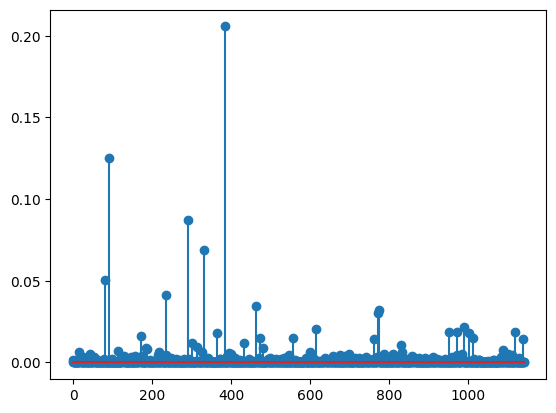

In [ ]:
plt.stem(np.arange(len(train_data_corolla3)),price_model_05.get_influence().summary_frame()['cooks_d'])

In [ ]:
price_model_05.rsquared

0.8812333610524521

In [ ]:
train_data_corolla3.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Gears', 'Weight', 'Diesel',
       'Petrol'],
      dtype='object')

In [ ]:
test_data.columns

Index(['Price', 'Age', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Gears',
       'Weight', 'Diesel', 'Petrol'],
      dtype='object')

In [ ]:
test_data.drop(['Automatic','Doors'],axis=1,inplace=True)

In [ ]:
test_data.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Gears', 'Weight', 'Diesel',
       'Petrol'],
      dtype='object')

## Prediction Of the Price Form the model.

In [ ]:
test_data['Predicted_price']=price_model_05.predict(test_data[['Age',	'KM',	'HP',	'cc',	'Gears',	'Weight',	'Diesel',	'Petrol']])

In [ ]:
test_data.head()

,Price,Age,KM,HP,cc,Gears,Weight,Diesel,Petrol,Predicted_price
57,15250,26,43000,97,1400,5,1110,0,1,16082.286976
338,12750,43,30742,110,1600,5,1040,0,1,12077.915044
465,11450,55,68520,72,2000,5,1115,1,0,9816.384141
1143,8950,75,102005,107,1600,5,1105,0,1,9015.296339
715,8490,62,90000,110,1600,5,1050,0,1,9212.102468


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(test_data['Price'],test_data['Predicted_price'])
mse
r2 = r2_score(test_data['Price'],test_data['Predicted_price'])
r2

0.8912106851838567

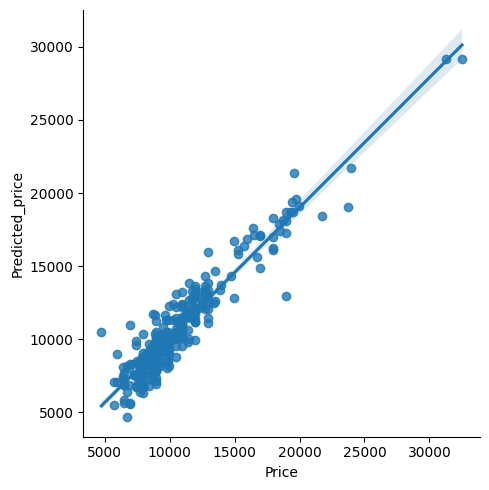

In [ ]:
sns.lmplot(x='Price',y='Predicted_price',data=test_data)

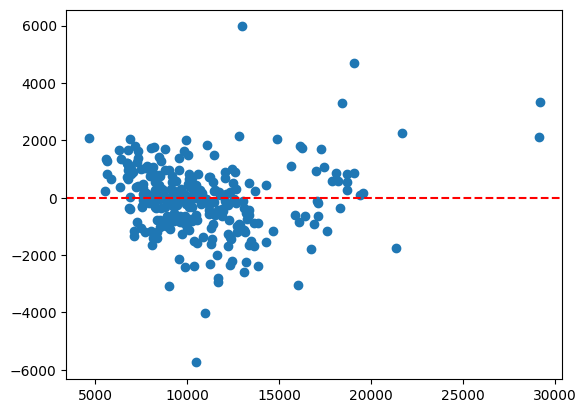

In [ ]:
residuals = test_data['Price']-test_data['Predicted_price']
plt.scatter(test_data['Predicted_price'],residuals)
plt.axhline(y=0,color='r',linestyle='--')

> # Normalization and Standardization





* Normalization and Standardization are the techniques used to simplify the data before being used for model building to improve the model performance.
* In Python standardization and normalization can be done using ```sklearn.preprocessing``` library
```
from sklearn.preprocessing
import StandardScaler, MinMaxScaler
```
* MinMaxScaler - Normalization
* StandardScaler - Standardization

> **Normalization**
```
* it transforms the data points into values between 0 and 1
* It is used when the range of the data is high
```
```
scaler=MinMaxScaler()
normalized_data = scaler.fit_transform(data)
```

> **Standardization**
```
* It transforms the data so that the mean of the data is 0 and standard deviation is 1
* Used when the data is normally distributed.
```

```
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
```



> # Multicollinearity in Multiple linear regression.



>
* Multicollinearity can be Detected by calculating Variance Inflation Factor.
* VIF value Greater than 10 indicates high multicollinearity
* The Column with highest VIF value can be deleted to address the multicollinearity.

> VIF = 1/(1-r2)

r2 value is calculated by creating a new model with the column in question as response variable.

```
column_name_rsquared = ols('column_name~column1+column2',data=df).fit().rsquared()

column_name_vif =1/(1-column_name_rsquared)
```
